#### Name: Sumanasekara W.K.G.G.
#### Index: 190610E

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

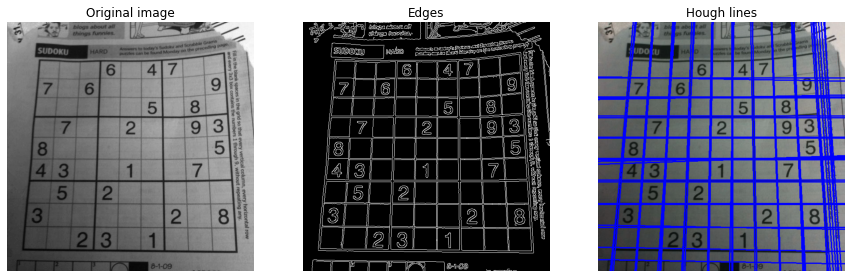

In [22]:
im = cv.imread("sudoku.png", cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 20, 120, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 175)

for line in lines:
    rho, theta = line[0]
    a, b = np.cos(theta), np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(y0 + 1000*a)
    x2, y2 = int(x0 - 1000*(-b)), int(y0 - 1000*a)
    cv.line(im, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(gray, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Original image")
ax[1].imshow(edges, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Edges")
ax[2].imshow(im)
ax[2].axis('off')
ax[2].set_title("Hough lines")
plt.show()

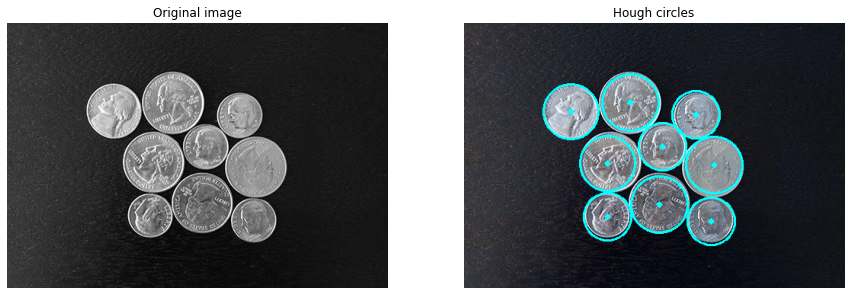

In [54]:
im = cv.imread("coins.jpg", cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 50, param1=150, param2=20, minRadius=30, maxRadius=38)
circles = np.uint16(np.round(circles))

for i in circles[0, :]:
    cv.circle(im, (i[0], i[1]), i[2], (0, 255, 255), 2)
    cv.circle(im, (i[0], i[1]), 2, (0, 255, 255), 3)

fig, ax = plt.subplots(1, 2, figsize=(15, 10))
ax[0].imshow(gray, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Original image")
ax[1].imshow(im)
ax[1].axis('off')
ax[1].set_title("Hough circles")
plt.show()


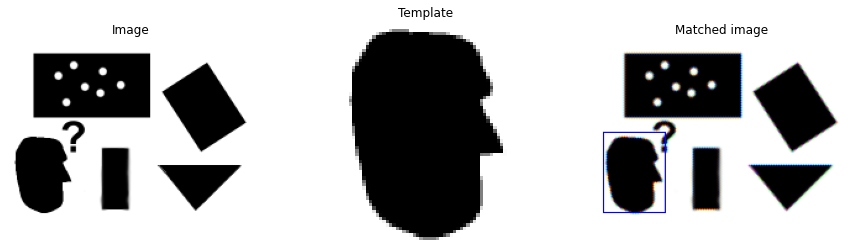

In [62]:
img=cv.imread('pic1.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert img is not None
templ=cv.imread('templ.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert templ is not None

img_edges = cv.Canny(img, 50, 250)
templ_edges = cv.Canny(templ, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(templ_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(img_edges)

out = cv.cvtColor(img, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = templ.shape[0] / 2. * scale
    halfWidth = templ.shape[1] / 2. * scale
    p1 = (int(x-halfWidth), int(y-halfHeight))
    p2 = (int(x+halfWidth), int(y+halfHeight))
    cv.rectangle(out, p1, p2, (0,0,255))

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
ax[0].imshow(img, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Image")
ax[1].imshow(templ, cmap='gray')
ax[1].axis('off')
ax[1].set_title("Template")
ax[2].imshow(out)
ax[2].axis('off')
ax[2].set_title("Template matching")
plt.show()

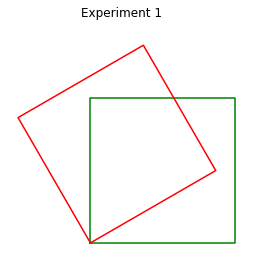

In [88]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a, b, c, d]).T

theta, scale = np.pi/6, 1
tx, ty = 0, 0
H = np.array(((scale*np.cos(theta), -scale*np.sin(theta), tx), (scale*np.sin(theta), scale*np.cos(theta), ty), (0, 0, 1)))
Y = H@X

fig, ax = plt.subplots(1, 1)

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')

fig.suptitle("Experiment 1")
ax.axis('off')
plt.show()

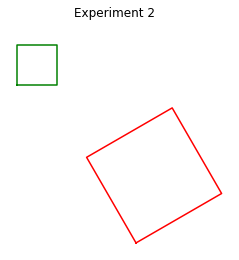

In [90]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a, b, c, d]).T

theta, scale = np.pi/6, 2.5
tx, ty = 3, -4
H = np.array(((scale*np.cos(theta), -scale*np.sin(theta), tx), (scale*np.sin(theta), scale*np.cos(theta), ty), (0, 0, 1)))
Y = H@X

fig, ax = plt.subplots(1, 1)

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])
ax.plot(x, y, color='g')
ax.set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax.plot(x, y, color='r')
ax.set_aspect('equal')

fig.suptitle("Experiment 2")
ax.axis('off')
plt.show()

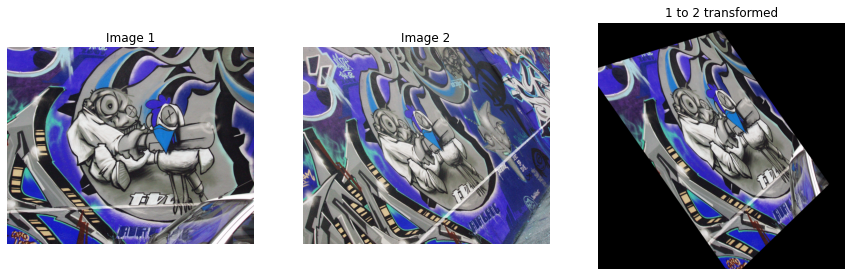

In [104]:
im1 = cv.imread(r"graf\img1.ppm", cv.IMREAD_ANYCOLOR)
assert im1 is not None
im4 = cv.imread(r"graf\img4.ppm", cv.IMREAD_ANYCOLOR)
assert im4 is not None

H = np.array(((6.6378505e-01,   6.8003334e-01,  -3.1230335e+01),
            (-1.4495500e-01,   9.7128304e-01,   1.4877420e+02),
            (4.2518504e-04,  -1.3930359e-05,   1.0000000e+00)))

im1to4 = cv.warpPerspective(im1, H, (750, 750))

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(im1)
ax[0].axis('off')
ax[0].set_title("Image 1")
ax[1].imshow(im4)
ax[1].axis('off')
ax[1].set_title("Image 2")
ax[2].imshow(im1to4)
ax[2].axis('off')
ax[2].set_title("1 to 2 transformed")
plt.show()